In [8]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

### Shampoo Sales Dataset

Load dataset

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('Datasets/sales-of-shampoo-over-a-three-ye.csv', 
                  header=0, parse_dates=[0], index_col=0,squeeze=True, 
                  date_parser=parser)

Head of data and timeseries graph of sales

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


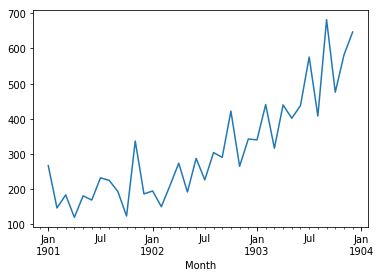

In [3]:
print(series.head())
series.plot()
pyplot.show()

plotting autocorrelation

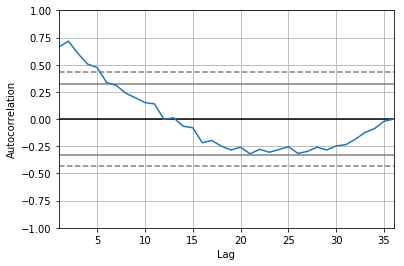

In [4]:
autocorrelation_plot(series)
pyplot.show()

### ARIMA with Python

Fitting Model

In [5]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/nauman/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nauman/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nauman/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nauman/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In t

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Wed, 28 Nov 2018   AIC                            406.340
Time:                                                 12:48:10   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

Plotting residual errors

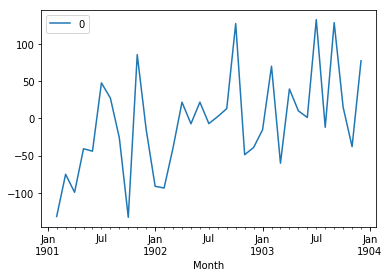

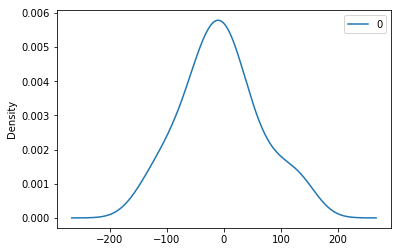

                0
count   35.000000
mean    -5.495113
std     68.132888
min   -133.296507
25%    -42.477803
50%     -7.186500
75%     24.748427
max    133.238051


In [6]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### Rolling Forecast ARIMA Model

/home/nauman/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nauman/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nauman/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpr

(array([349.11770232]), array([58.13903673]), array([[235.16728424, 463.0681204 ]]))
predicted=349.117702, expected=342.300000
(array([306.51300916]), array([56.84468761]), array([[195.09946872, 417.92654959]]))
predicted=306.513009, expected=339.700000
(array([387.37641278]), array([56.0429312]), array([[277.53428605, 497.21853952]]))
predicted=387.376413, expected=440.400000
(array([348.15435386]), array([55.48522578]), array([[239.40530965, 456.90339807]]))
predicted=348.154354, expected=315.900000
(array([386.30889025]), array([54.60071078]), array([[279.29346359, 493.3243169 ]]))
predicted=386.308890, expected=439.300000
(array([356.08204597]), array([54.32883195]), array([[249.59949203, 462.56459991]]))
predicted=356.082046, expected=401.300000
(array([446.37948015]), array([54.05599919]), array([[340.43166859, 552.32729172]]))
predicted=446.379480, expected=437.400000
(array([394.73728548]), array([53.14167812]), array([[290.58151028, 498.89306067]]))
predicted=394.737285, expec

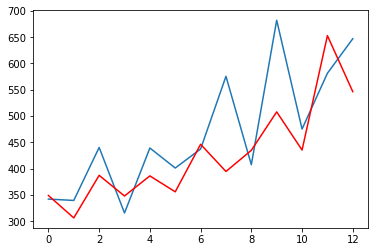

In [10]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    print(output)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()